# Customer Churn Analysis - Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Exploratory Data Analysis (and some cleaning)

Let's get started by getting this dataset loaded into our notebook for a small glimpse of the data.

In [4]:
print('We have %d rows (observations) of data with %d columns (features).\n' % (data.shape[0], data.shape[1]))
dups = data[data.duplicated()]
print("Number of duplicate rows: %d\n" % len(dups))

We have 7043 rows (observations) of data with 21 columns (features).

Number of duplicate rows: 0



# First, let's view the size of this dataset, find out if anything is missing from it, and if we have any duplicate entries.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Also, we want to get a look at the target variable before we go any further.

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

So, right from the start, we see we have a major imbalance in the dataset. Let's visualize this.

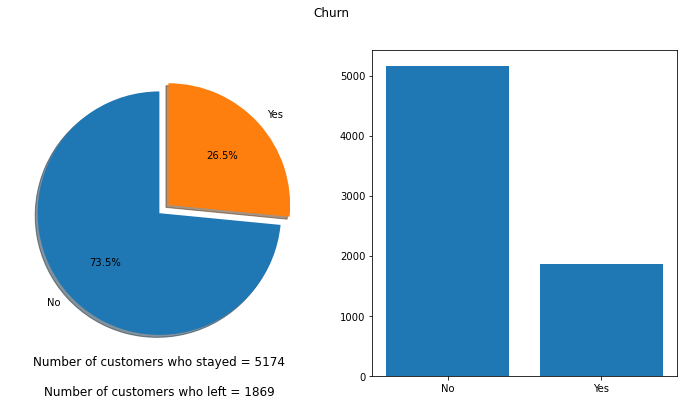

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)

ax1.pie(data['Churn'].value_counts(), explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90, labels=data['Churn'].unique())
fig.set_facecolor('white')

ax2.bar(data['Churn'].unique(), data['Churn'].value_counts())
ax1.text(0.5, 0.0, "Number of customers who stayed = %d" % len(data[data['Churn'] == 'No']), size=12, ha="center", 
         transform=ax1.transAxes)
ax1.text(0.5,-0.1, "Number of customers who left = %d" % len(data[data['Churn'] == 'Yes']), size=12, ha="center", 
         transform=ax1.transAxes)

plt.suptitle('Churn')
plt.show()

Next, we'll display some plots for the various columns to get a good understanding of how the data is distributed.

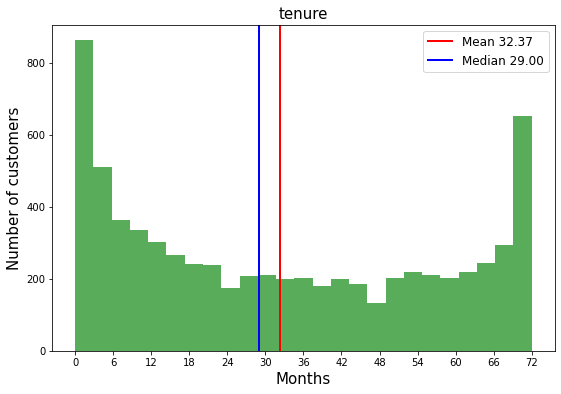

In [11]:
plt.figure(figsize = (9,6))
ten_mean = np.mean(data['tenure'])
ten_med = np.median(data['tenure'])
plt.hist(data["tenure"], bins = 25, alpha = 0.65, color = 'green')
plt.title("tenure", fontsize = 15)
plt.ylabel("Number of customers", fontsize = 15)
plt.xlabel("Months", fontsize = 15)
plt.xticks(np.arange(0, 75, step=6))
plt.axvline(ten_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % ten_mean)
plt.axvline(ten_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % ten_med)
plt.legend(fontsize = 12)
plt.show()

Wow, that is A LOT of customers leaving in their first 5 months with the company. It looks like something happens around the 6 year mark that is also causing people to leave, but we can't automatically jump to the conclusion in this case; it could be an effect of data collection or some other unknown cause. Let's focus on those people leaving in the first 5 months and see if they are breaking contract or leaving their Month-to-month plans.

In [12]:
print("Percentage of customers who left before 6 months? : %.2f%%" % ((len(data[data['tenure'] < 6])) / len(data['tenure']) * 100))

Percentage of customers who left before 6 months? : 19.47%


In [13]:
under_6 = data[data['tenure'] < 6]

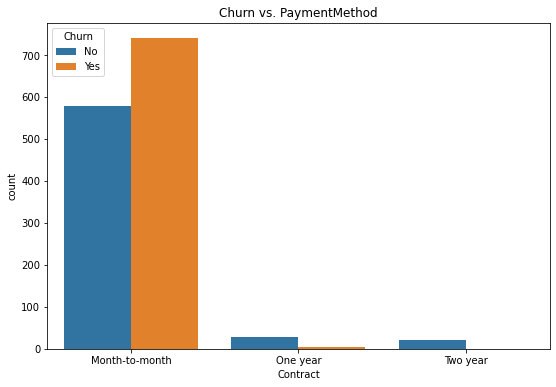

In [14]:
sns.set_palette(sns.color_palette())
plt.figure(figsize=(9,6))
sns.countplot(x=under_6['Contract'], hue=under_6['Churn']).set_title('Churn vs. PaymentMethod')
plt.show()

The good news here is that there aren't that many customers who become so disgruntled that they decide to break contract. The amount of Month-to-month customers leaving before 6 months is still alarming though.

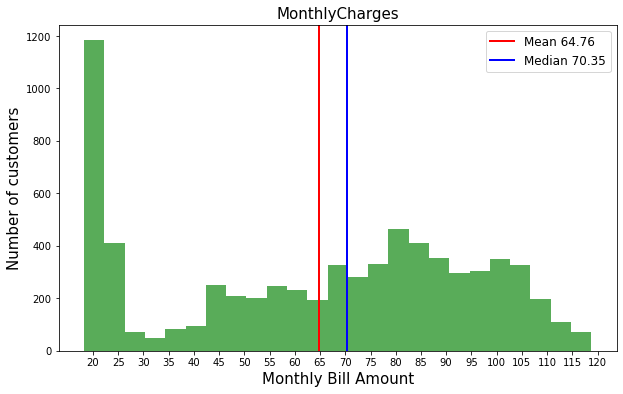

In [15]:
plt.figure(figsize = (10,6))
mc_mean = np.mean(data['MonthlyCharges'])
mc_med = np.median(data['MonthlyCharges'])
plt.hist(data["MonthlyCharges"], bins = 25, alpha = 0.65, color = 'green')
plt.xticks(np.arange(20, 125, step=5))
plt.title("MonthlyCharges", fontsize = 15)
plt.ylabel("Number of customers", fontsize = 15)
plt.xlabel("Monthly Bill Amount", fontsize = 15)
plt.axvline(mc_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % mc_mean)
plt.axvline(mc_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % mc_med)
plt.legend(fontsize = 12)
plt.show()

In [26]:
# Convert data in 'TotalCharges' from string to float.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [27]:
print("How many missing values in 'TotalCharges' after coercion? : %d" % data['TotalCharges'].isnull().sum())
print("What percentage of the data are these missing values? : %0.2f%%" % ((data['TotalCharges'].isnull().sum()) / (len(data['TotalCharges'])) * 100))

How many missing values in 'TotalCharges' after coercion? : 11
What percentage of the data are these missing values? : 0.16%


After coercion of TotalCharges from string to float, we see that we actaully do have some missing values. It is safe to assume that these values are simply missing at random, so we’ll just remove these observations considering they only account for 0.16% of the data.

Note: If we REALLY wanted to retain these rows, an easy fix is to fill the missing value with the mean or median. A more time consuming fix would be to construct a regression model that predicts these values - it would likely give us a better imputed value.

In [30]:
data2 = data[data["TotalCharges"].notnull()] # Keep rows for which 'TotalCharges' has recorded data
data2 = data2.reset_index(drop=True) # Reset the index of the dataframe

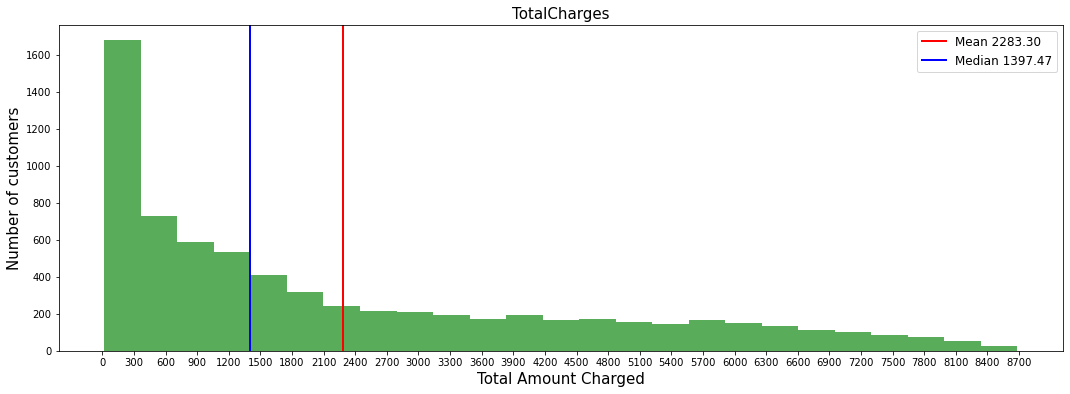

In [31]:
plt.figure(figsize = (18,6))
tc_mean = np.mean(data2['TotalCharges'])
tc_med = np.median(data2['TotalCharges'])
plt.hist(data2['TotalCharges'], bins = 25, alpha = 0.65, color = 'green')
plt.title('TotalCharges', fontsize = 15)
plt.ylabel("Number of customers", fontsize = 15)
plt.xlabel("Total Amount Charged", fontsize = 15)
plt.xticks(np.arange(0, 8800, 300))
plt.axvline(tc_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % tc_mean)
plt.axvline(tc_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % tc_med)
plt.legend(fontsize = 12)
plt.show()

We had to stretch out this histogram in order to get a better look, but we see that 21.33% of the customers had TotalCharges less than $300.

With the visuals above we can gather that:

Getting these customers to stay for even just 6 months is a major problem. This accounts for 19.34% of customers in the dataset.
The minimum amount a customer can pay per month is $18.25 and 19.94% of customers are paying no more than $6.75 of that minimum amount.
About 1/5 of the customers in this data set have only been charged less than $300 total, which makes sense when we consider the previous two points.

Something else we should look into are the columns that have a relationship with InternetService. For columns OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies the responses are: 'Yes', 'No', and 'No internet service'. We should make sure that if a customer has no internet service they also have a response for the above columns of 'No internet service'. If this is the case across the board, we can change these columns to binary variables with responses of simply 'Yes' or 'No'.

In [32]:
print("Percentage of customers with TotalCharges less than $300? %.2f%%" % ((len(data2[data2['TotalCharges'] < 300])) / len(data2['TotalCharges']) * 100))

Percentage of customers with TotalCharges less than $300? 21.33%


In [33]:
no_www = data2[data2.InternetService == 'No'] # Subset customers that have no internet service

In [34]:
# Check for unique values in the given columns. Should only print 'No internet service' to confirm our assumption.
print(no_www['OnlineSecurity'].unique())
print(no_www['OnlineBackup'].unique())
print(no_www['DeviceProtection'].unique())
print(no_www['TechSupport'].unique())
print(no_www['StreamingTV'].unique())
print(no_www['StreamingMovies'].unique())

['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']


Confirmed! So, for the above columns/variables, we'll convert to binary. Which, in this case, simply means that we are removing a 3rd response option, leaving us with only 'Yes' or 'No'.

In [35]:
# Create a list for looping through the dataframe and converting to binary 
binaries = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [36]:
# Loop and replace
for i in binaries:
    data2[i] = data2[i].replace({'No internet service' : 'No'})

Next, just a bit of manipulation for the sake of aesthetic in our charts.

In [37]:
data2["SeniorCitizen"] = data2["SeniorCitizen"].replace({1:"Yes",0:"No"}) # We will convert this back later - this is only for the EDA.

Now let's look at customer churning against the different variables.

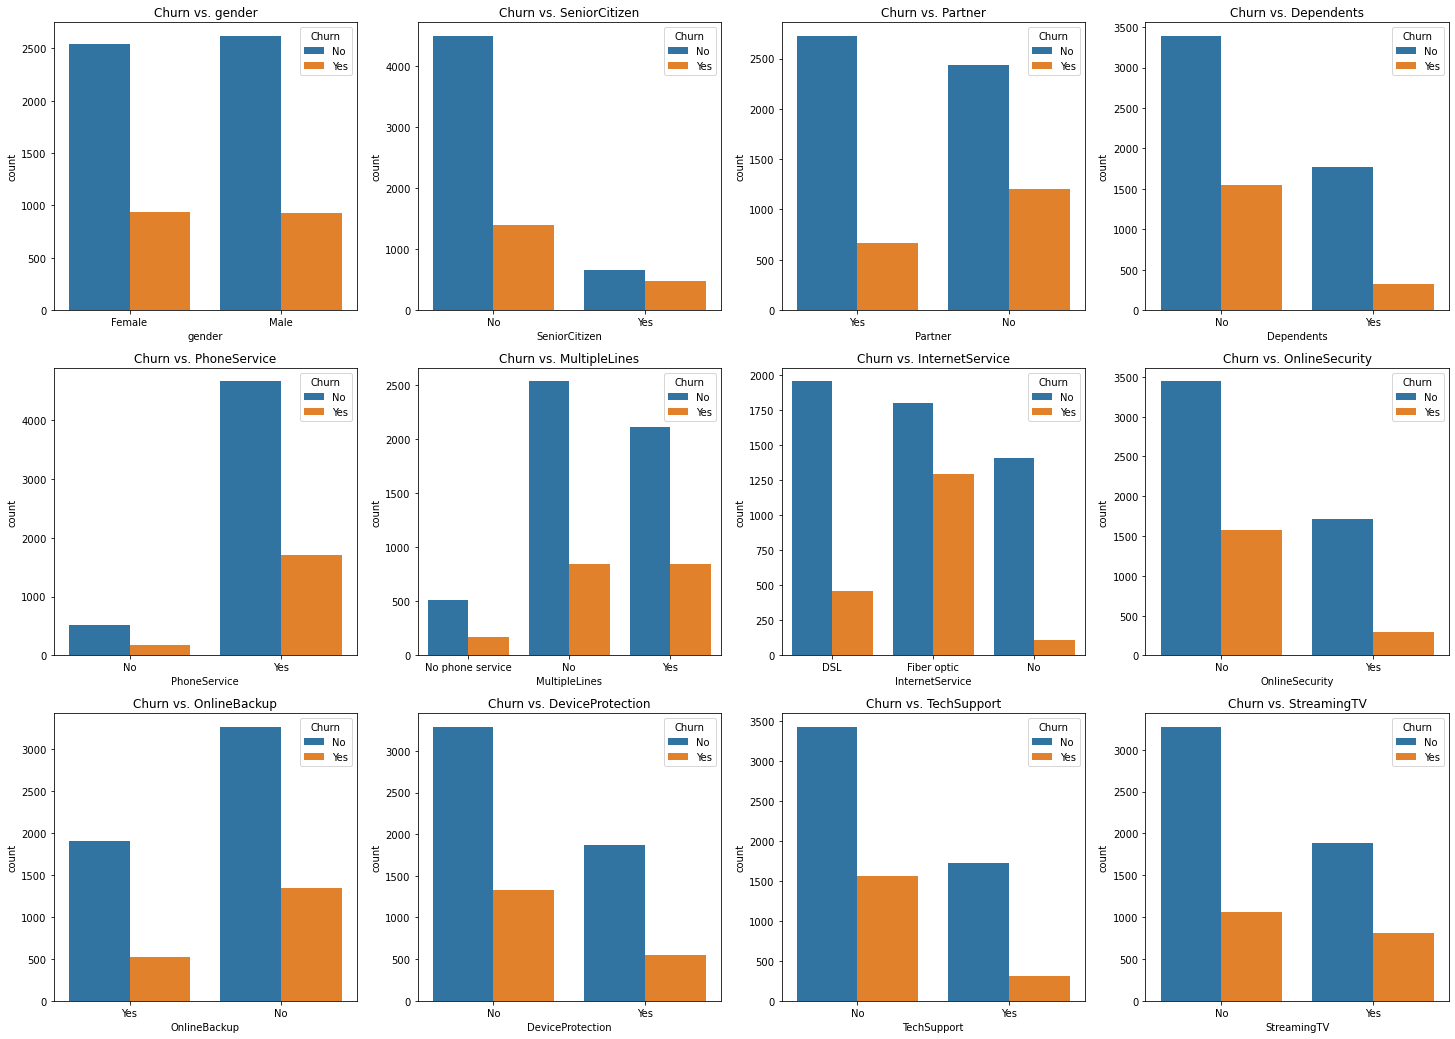

In [39]:
sns.set_palette(sns.color_palette())
fig, ax=plt.subplots(3,4,figsize=(25,18))

sns.countplot(x=data2['gender'], hue=data2['Churn'], ax=ax[0,0])
ax[0,0].set_title('Churn vs. gender')
sns.countplot(x=data2['SeniorCitizen'], hue=data2['Churn'], ax=ax[0,1])
ax[0,1].set_title('Churn vs. SeniorCitizen')
sns.countplot(x=data2['Partner'], hue=data2['Churn'], ax=ax[0,2])
ax[0,2].set_title('Churn vs. Partner')
sns.countplot(x=data2['Dependents'], hue=data2['Churn'], ax=ax[0,3])
ax[0,3].set_title('Churn vs. Dependents')

sns.countplot(x=data2['PhoneService'], hue=data2['Churn'], ax=ax[1,0])
ax[1,0].set_title('Churn vs. PhoneService')
sns.countplot(x=data2['MultipleLines'], hue=data2['Churn'], ax=ax[1,1])
ax[1,1].set_title('Churn vs. MultipleLines')
sns.countplot(x=data2['InternetService'], hue=data2['Churn'], ax=ax[1,2])
ax[1,2].set_title('Churn vs. InternetService')
sns.countplot(x=data2['OnlineSecurity'], hue=data2['Churn'], ax=ax[1,3])
ax[1,3].set_title('Churn vs. OnlineSecurity')

sns.countplot(x=data2['OnlineBackup'], hue=data2['Churn'], ax=ax[2,0])
ax[2,0].set_title('Churn vs. OnlineBackup')
sns.countplot(x=data2['DeviceProtection'], hue=data2['Churn'], ax=ax[2,1])
ax[2,1].set_title('Churn vs. DeviceProtection')
sns.countplot(x=data2['TechSupport'], hue=data2['Churn'], ax=ax[2,2])
ax[2,2].set_title('Churn vs. TechSupport')
sns.countplot(x=data2['StreamingTV'], hue=data2['Churn'], ax=ax[2,3])
ax[2,3].set_title('Churn vs. StreamingTV')
plt.show()

# Only a few things of note from these graphs above:

Senior Citizen customers luckily make up a small portion of the business because almost as many left as stayed.

The amount of customers with a partner versus with no partner is fairly even. 

But if we look at customers who don't have a partner and left the company, the amount is almost double those with a partner who left.

There are less customers using Fiber Optic InternetService than there are using DSL service.

However, the amount of customers who left the company and had Fiber Optic InternetService versus the amount who left and had DSL is more than double.

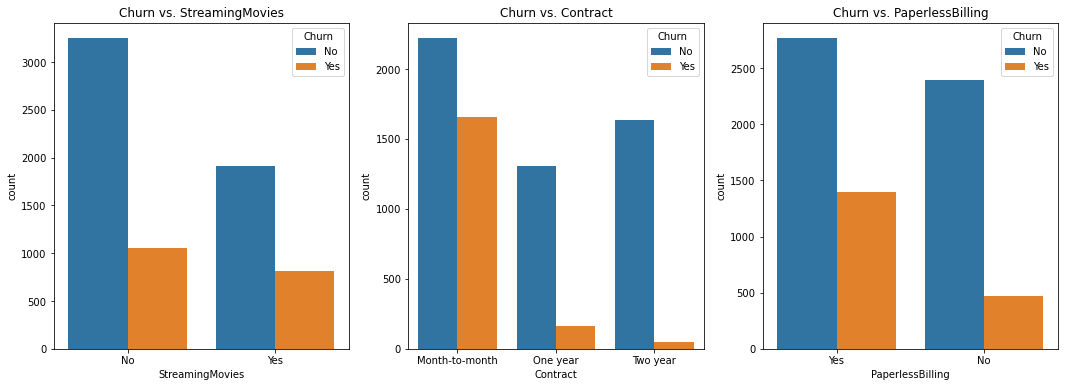

In [40]:
fig, ax = plt.subplots(1,3,figsize=(18,6))

sns.countplot(x=data2['StreamingMovies'], hue=data2['Churn'], ax=ax[0])
ax[0].set_title('Churn vs. StreamingMovies')
sns.countplot(x=data2['Contract'], hue=data2['Churn'], ax=ax[1])
ax[1].set_title('Churn vs. Contract')
sns.countplot(x=data2['PaperlessBilling'], hue=data2['Churn'], ax=ax[2])
ax[2].set_title('Churn vs. PaperlessBilling')
plt.show()

Two things stand out from these three graphs above:

Look at all those Month-to-month customers who leave the company in the Churn vs. Contract graph!
Customers with paperless billing left at a much higher frequency than customers who recieve paper copies of their bill.

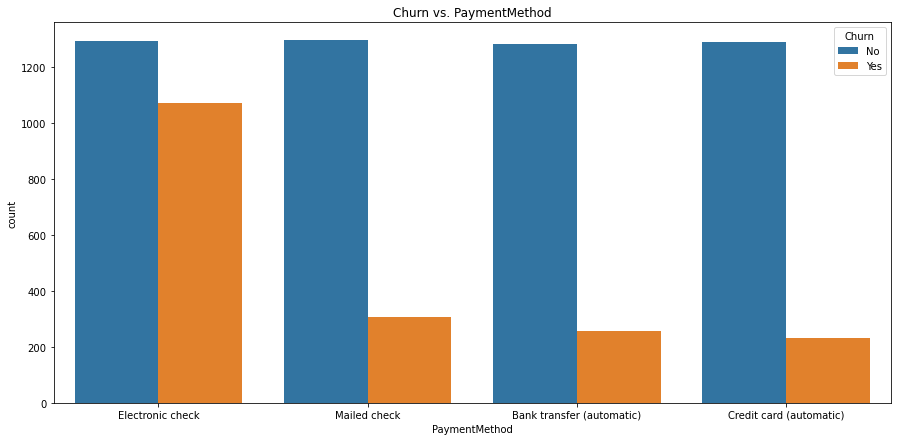

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x=data2['PaymentMethod'], hue=data2['Churn']).set_title('Churn vs. PaymentMethod')
plt.show()

This is interesting: People pay their bill equally porportional across all methods, but for some reason those who pay electronically are leaving the company at almost 4 times the rate. The raw numbers are below.

In [42]:
pay_meth = pd.DataFrame(data2.groupby(['PaymentMethod', 'Churn'])['Churn'].count())
pay_meth

Churn
PaymentMethod             Churn       
Bank transfer (automatic) No      1284
                          Yes      258
Credit card (automatic)   No      1289
                          Yes      232
Electronic check          No      1294
                          Yes     1071
Mailed check              No      1296
                          Yes      308

# Data Preprocessing

More libraries:

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

The goal in this section, Data Preprocessing, is to get our data ready for modeling. In this project we will do that in three ways:

We'll be creating dummy variables using get_dummies() from pandas. This will create new columns out of our categorical features. To demonstrate, Contract will get binary columns for each response: Contract_Month-to-month : 1 or 0, Contract_One year : 1 or 0, etc. and of course, 1 or 0 will be indicate Yes or No, respectively. Another (faster) way we could've done this is using a pipline with a column transformer. However, retaining the column names to learn about feature importances would be a hefty task.

We don't want to go creating a ton of dummy variables, so we'll only use get_dummies() on the categorical features that have more than 2 responses. For the rest - the binary features - we can just map all the 'Yes' responses to equal 1 and all the 'No' responses to equal 0.

We will then take our continuous variables (tenure, MonthlyCharges, TotalCharges) and scale them using StandardScaler(). There is plenty to read on the internet about Feature Scaling. Here is the short version: each value in a column is subtracted by the mean of the column, that number is then divided by the standard deviation of the column, that value now replaces the original value and the end result is that the new mean of the column is 0 and the new standard deviation is 1. The point of this process is to get our variables on the same scale for more effective learning. Random Forest won't see much of an effect from this.

Before we do all that we will split the data into training and testing sets. The testing set will consist of 15% of the full dataset, which means that the training set will have 85% of the full dataset.

The final thing that we want to look into is the imbalance of our data. For the sake of our sanity, we'll run the models with the data after we conduct all of the above preprocessing steps. When we get all those results, we will use Synthetic Minority Over-Sampling Technique (SMOTE) to balance out the data and see if we get any improvements in accuracy.

In [44]:
# Drop 'customerID'
data2.drop('customerID', axis=1, inplace=True)

In [45]:
# List of categorical and continuous features, sperating binaries, and exlcuding 'gender' and target variable 'Churn'.
cont_feats = ['tenure', 'MonthlyCharges', 'TotalCharges']
binary_feats = [i for i in data2.columns[:-1] if len(data2[i].unique()) == 2]
binary_feats.remove('gender')
cat_feats = [i for i in data2.columns[:-1] if i not in cont_feats + binary_feats]

In [47]:
# Map the binaries 'Yes' and 'No' responses to equal 1 and 0, respectively.
data2[binary_feats] = data2[binary_feats].replace(to_replace=['Yes', 'No'], value=[1, 0])

In [48]:
# Creat the dummy variables for features with more than 2 responses
final_dat = pd.get_dummies(data2, columns=cat_feats)

In [49]:
# Train/Test Split
train_set, test_set = train_test_split(final_dat, test_size=0.15, random_state=2021)

In [50]:
# Finalize our list of features
feats = [i for i in final_dat if i != 'Churn']

In [51]:
# Finalize the structure
data_tr = train_set[feats].copy()
train_labels = train_set['Churn'].copy()
data_te = test_set[feats].copy()
test_labels = test_set['Churn'].copy()

In [52]:
# Scale the train data
col_trans = ColumnTransformer([
    ('num', StandardScaler(),  cont_feats)], remainder='passthrough')

train_prep = col_trans.fit_transform(data_tr)

In [53]:
# Scale the test data based on the training data
test_prep = col_trans.transform(data_te)

In [54]:
# Restructure the list of feature names so that we can use it for feature importances later
new_order = [i for i in data_tr.columns if i not in cont_feats]
new_order = cont_feats+new_order

In [55]:
train_prep.shape

(5977, 29)

# Modeling

Regarding metrics and scoring the performance of our model: Obviously, the company wants to retain as many customers as possible. The goal of this project is to correctly predict which customers will churn. From a business viewpoint, we would want to allocate resources toward focusing on the characteristics of a customer who churns, and spend money there with the goal of reducing churning. Interpeting that from a machine learning perspective: we want to focus on Recall which is a measure used for the effort of reducing False Negatives. We can't let customers slip away because we incorrectly predicted that they would stay.
TL;DR - We will be using recall for our scoring measure.
And even more libraries:

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from numpy import random

# Random Forest

We are going to implement RandomizedSearchCV to help us tune our model so we are using the best parameters from a list of different parameters we would like to train on.

In [57]:
# Outline parameters to test
param_grid = {
    'n_estimators': random.randint(100,600,3),
    'max_features' : random.randint(10,29,3),
    'max_depth' : [3,4,5],
    'bootstrap' : [True, False]
}

In [58]:
rf_clf = RandomForestClassifier(random_state=2021)
rf_grid = RandomizedSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy',
                           return_train_score=True)
rf_grid.fit(train_prep, train_labels)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2021),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5],
                                        'max_features': array([18, 28, 12]),
                                        'n_estimators': array([162, 271, 324])},
                   return_train_score=True, scoring='accuracy')

In [59]:
cvres = rf_grid.cv_results_
grid_rf_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
pd.set_option('display.max_colwidth', None)
grid_rf_df.tail(10)

,Train_Error,Test_Error,Parameter_Set
0,0.799481,0.793708,"{'n_estimators': 324, 'max_features': 18, 'max_depth': 4, 'bootstrap': False}"
1,0.815710,0.803078,"{'n_estimators': 271, 'max_features': 12, 'max_depth': 5, 'bootstrap': True}"
2,0.813452,0.800569,"{'n_estimators': 324, 'max_features': 28, 'max_depth': 5, 'bootstrap': True}"
3,0.799816,0.793039,"{'n_estimators': 271, 'max_features': 18, 'max_depth': 4, 'bootstrap': False}"
4,0.813033,0.799397,"{'n_estimators': 324, 'max_features': 12, 'max_depth': 5, 'bootstrap': False}"
5,0.793374,0.791533,"{'n_estimators': 162, 'max_features': 18, 'max_depth': 3, 'bootstrap': True}"
6,0.793207,0.790529,"{'n_estimators': 162, 'max_features': 28, 'max_depth': 3, 'bootstrap': True}"
7,0.813786,0.800234,"{'n_estimators': 271, 'max_features': 28, 'max_depth': 5, 'bootstrap': True}"
8,0.804166,0.789525,"{'n_estimators': 271, 'max_features': 28, 'max_depth': 5, 'bootstrap': False}"
9,0.793793,0.791533,"{'n_estimators': 271, 'max_features': 12, 'max_depth': 3, 'bootstrap': True}"


In [60]:
final_model = rf_grid.best_estimator_
rf_preds = final_model.predict(test_prep)
rfmod_pred_score = accuracy_score(test_labels, rf_preds)
rfmod_recall = recall_score(test_labels, rf_preds, pos_label='Yes')

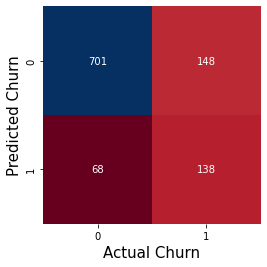

Total predictions = 1055


In [61]:
mat = confusion_matrix(test_labels, rf_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(test_labels))

In [62]:
print('Train error rate = %.2f%%' % ((1 - rf_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - rfmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (rfmod_recall * 100))

Train error rate = 19.69%
Test error rate = 20.47%
Test Recall = 48.25%


The training error rate being within ~1.3% of the testing error rate lets us know that if we have any issues modeling, it might be underfitting, but that number isn't enough to be concerned about at this time.

In [63]:
print(classification_report(test_labels, rf_preds))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87       769
         Yes       0.67      0.48      0.56       286

    accuracy                           0.80      1055
   macro avg       0.75      0.70      0.71      1055
weighted avg       0.78      0.80      0.78      1055



The plot above is called a confusion matrix. The X axis is the actual value from the data set, the y axis is the predicted value. Here is what the confusion matrix tells us:

Our recall score, 50%, is not good. It says that we are only correctly predicting when a customer will churn half of the time.

Overall accuracy at 79% is also not good. We'll have to check other models and see if we can improve.

The model does fairly well in predicting that customers will stay, but not so much in predicting that a customer will leave. This is a given considering the imbalance in our data favors customers who do not churn.

Next, we'll look at which features the model considered most important for making its predictions.

In [64]:
## Create a pandas dataframe out of our train_prep array and add the columns in the correct order
df = pd.DataFrame(train_prep, columns = new_order)

In [65]:
rf_importances = pd.DataFrame(rf_grid.best_estimator_.feature_importances_,
                                   index = df.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)

rf_importances[:10]

,Importance
Contract_Month-to-month,0.293002
tenure,0.189597
InternetService_Fiber optic,0.131818
TotalCharges,0.092610
MonthlyCharges,0.076599
PaymentMethod_Electronic check,0.058784
Contract_Two year,0.044035
InternetService_No,0.026566
InternetService_DSL,0.017447
Contract_One year,0.013462


We have a lot of features, so lets just plot the top 5.

In [66]:
top_5 = rf_importances[rf_importances['Importance'] > .05]

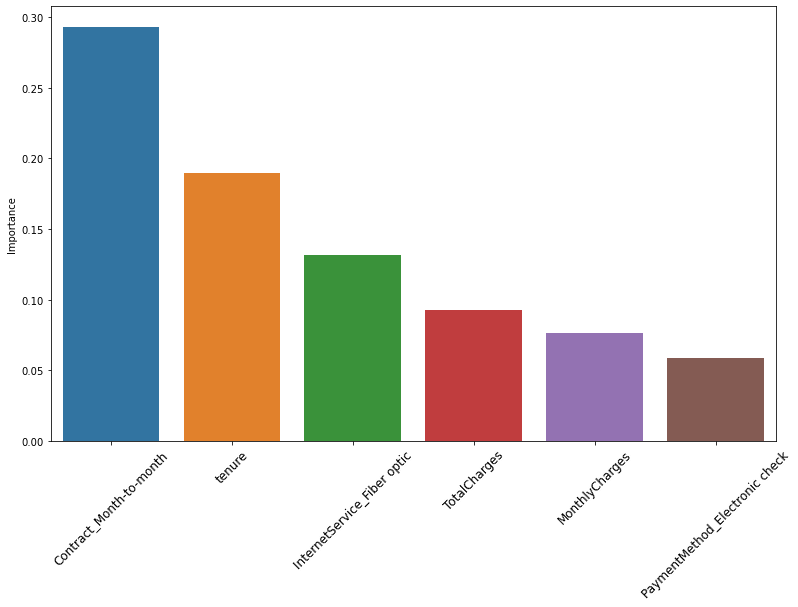

In [67]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top_5.index, top_5['Importance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

The barplot above tells us that the most important feature in making predictions is Contract_Month-to-month, followed by tenure, InternetService_Fiber optic, TotalCharges, and MonthlyCharges, respectively.

# Logistic Regression Classifier

Now lets play with Logistic Regression and see if we get any better performance.

In [68]:
# Outline parameters to test
param_grid = [
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['l2'], 'solver': ['lbfgs'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,600,3), 'penalty': ['none'], 'tol': [.01, .001, .0001]},  
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['l1'], 'solver': ['liblinear'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio':[.25, .5, .75], 'tol': [.01, .001, .0001]}
]

In [69]:
log_clf = LogisticRegression()
log_grid = RandomizedSearchCV(log_clf, param_grid, cv=3, scoring='accuracy',
                           return_train_score=True)
log_grid.fit(train_prep, train_labels)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.1, 0.5, 1],
                                         'max_iter': array([580, 528, 144]),
                                         'penalty': ['l2'], 'solver': ['lbfgs'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'max_iter': array([144, 381, 467]),
                                         'penalty': ['none'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'max_iter': array([199, 164, 116]),
                                         'penalty': ['l1'],
                                         'solver': ['liblinear'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'l1_ratio': [0.25, 0.5, 0.75],
                                         'max_iter': array([575, 564, 287]),
                                         'penalty': ['elasticnet'],
                                         'solver': ['saga'],
                                         'tol': [0.01, 0.001, 0.0001]}],
                   return_train_score=True, scoring='accuracy')

In [70]:
cvres = log_grid.cv_results_
grid_log_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
grid_log_df.tail(10)

,Train_Error,Test_Error,Parameter_Set
0,0.804584,0.804083,"{'tol': 0.0001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 575, 'l1_ratio': 0.5, 'C': 1}"
1,0.805086,0.801406,"{'tol': 0.0001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 528, 'C': 0.1}"
2,0.804835,0.802745,"{'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 199, 'C': 0.5}"
3,0.805588,0.801741,"{'tol': 0.0001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 575, 'l1_ratio': 0.75, 'C': 0.1}"
4,0.804501,0.803748,"{'tol': 0.001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 575, 'l1_ratio': 0.75, 'C': 0.5}"
5,0.803413,0.799398,"{'tol': 0.01, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 116, 'C': 0.1}"
6,0.805003,0.803079,"{'tol': 0.0001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 287, 'l1_ratio': 0.5, 'C': 0.5}"
7,0.804501,0.803748,"{'tol': 0.001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 564, 'l1_ratio': 0.75, 'C': 0.5}"
8,0.804250,0.802745,"{'tol': 0.001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 564, 'l1_ratio': 0.25, 'C': 0.1}"
9,0.805588,0.801741,"{'tol': 0.001, 'solver': 'saga', 'penalty': 'elasticnet', 'max_iter': 564, 'l1_ratio': 0.75, 'C': 0.1}"


In [71]:
final_model = log_grid.best_estimator_
log_preds = final_model.predict(test_prep)
logmod_pred_score = accuracy_score(test_labels, log_preds)
logmod_recall = recall_score(test_labels, log_preds, pos_label='Yes')

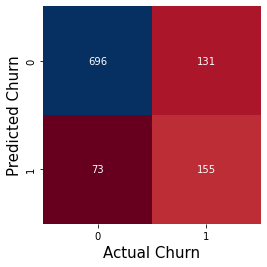

Total predictions = 1055


In [72]:
mat = confusion_matrix(test_labels, log_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(test_labels))

In [73]:

print('Train error rate = %.2f%%' % ((1 - log_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - logmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (logmod_recall * 100))

Train error rate = 19.59%
Test error rate = 19.34%
Test Recall = 54.20%


This model is even tighter than Random Forest, we have almost identical testing and training error rates.

In [74]:
print(classification_report(test_labels, log_preds))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87       769
         Yes       0.68      0.54      0.60       286

    accuracy                           0.81      1055
   macro avg       0.76      0.72      0.74      1055
weighted avg       0.80      0.81      0.80      1055



Understanding the Logistic Regression results:

Very subtle, ever so slight, but still, improvement on our focus metric - recall: 54.90%

We're still in the same ballpark for overall performance

To reiterate, we improved slightly on the recall score, but considering the way this project seems to be playing out, we are going to have to be happy with any imporovement

Looking at feature importanes for this model is a bit of a different venture. We will look at the coefficient values for our features, square them so that they are all positive and then take the square root, and rank them in descending order. The coefficients basically tell us how much weight each feature carries in predicting whether or not a customer will churn.

In [75]:
df = pd.DataFrame(log_grid.best_estimator_.coef_, columns = new_order).transpose()

In [76]:
df['square'] = df[0] ** 2
df['sqrt'] = [np.sqrt(i) for i in df['square']]
df = df.sort_values('sqrt', ascending=False)
df[:10]

,0,square,sqrt
tenure,-1.329330,1.767118,1.329330
InternetService_No,-0.793744,0.630029,0.793744
InternetService_Fiber optic,0.757375,0.573616,0.757375
Contract_Two year,-0.690580,0.476900,0.690580
Contract_Month-to-month,0.686788,0.471678,0.686788
TotalCharges,0.581181,0.337771,0.581181
TechSupport,-0.495594,0.245614,0.495594
OnlineSecurity,-0.345962,0.119690,0.345962
PaperlessBilling,0.330661,0.109337,0.330661
PaymentMethod_Electronic check,0.320948,0.103008,0.320948


In [79]:
top5 = df[df['sqrt'] > .5]

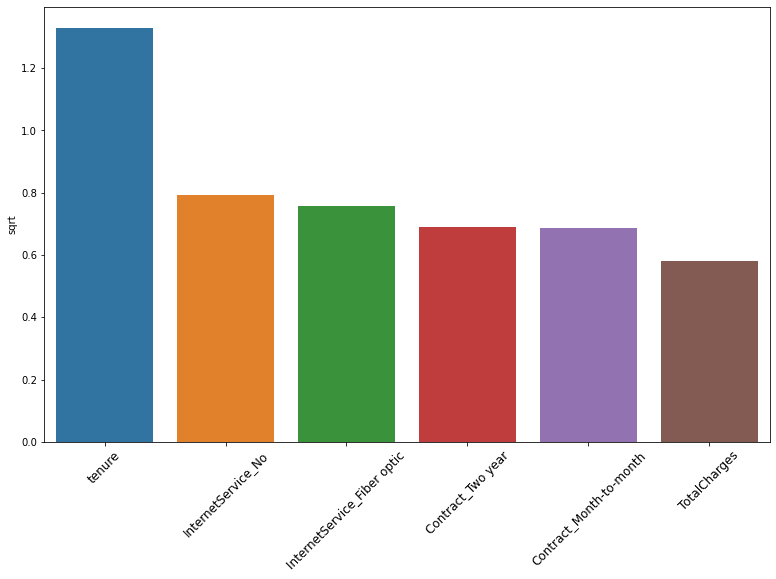

In [80]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top5.index, top5['sqrt'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

Logistic Regression has a slightly different take. It says that InternetService_No is the most important feature, followed by InternetSevice_Fiber optic, MonthlyCharges, tenure, and Contract_Two year.

# Support Vector Machine Classifier

In [81]:
param_grid = [    
    {'C': [.1,1,10], 'max_iter': random.randint(1000,3000,3), 'tol': [1e-4, 1e-10], 'gamma' : [3,5,7]},
    {'C': [.1,1,10], 'max_iter': [-1], 'tol': [1e-4, 1e-10]},
    {'C': [.1,1,10], 'max_iter': random.randint(1000,3000,3), 'kernel': ['linear']}
  ]

In [82]:
# Numerous convergence warnings
svm_clf = SVC(random_state=2021)
svm_grid = RandomizedSearchCV(svm_clf, param_grid, cv=3,
                           scoring='accuracy',
                           return_train_score=True, n_iter=15)
svm_grid.fit(train_prep, train_labels)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2099).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2099).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2099).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1632).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_i

RandomizedSearchCV(cv=3, estimator=SVC(random_state=2021), n_iter=15,
                   param_distributions=[{'C': [0.1, 1, 10], 'gamma': [3, 5, 7],
                                         'max_iter': array([1632, 2099, 2034]),
                                         'tol': [0.0001, 1e-10]},
                                        {'C': [0.1, 1, 10], 'max_iter': [-1],
                                         'tol': [0.0001, 1e-10]},
                                        {'C': [0.1, 1, 10],
                                         'kernel': ['linear'],
                                         'max_iter': array([2026, 1150, 1603])}],
                   return_train_score=True, scoring='accuracy')

In [83]:
cvres = svm_grid.cv_results_
grid_svc_df = pd.DataFrame({
    "Train_Error": cvres["mean_train_score"],
    "Test_Error": cvres["mean_test_score"],
    "Parameter_Set": cvres["params"],
}).sort_index()
grid_svc_df

,Train_Error,Test_Error,Parameter_Set
0,0.962690,0.754559,"{'tol': 0.0001, 'max_iter': 2099, 'gamma': 7, 'C': 1}"
1,0.975740,0.753387,"{'tol': 1e-10, 'max_iter': 1632, 'gamma': 5, 'C': 10}"
2,0.872009,0.782833,"{'tol': 0.0001, 'max_iter': -1, 'C': 10}"
3,0.735151,0.735151,"{'tol': 1e-10, 'max_iter': 2099, 'gamma': 3, 'C': 0.1}"
4,0.962523,0.754559,"{'tol': 0.0001, 'max_iter': 2034, 'gamma': 7, 'C': 1}"
5,0.973398,0.756399,"{'tol': 0.0001, 'max_iter': 2034, 'gamma': 3, 'C': 10}"
6,0.735151,0.735151,"{'tol': 0.0001, 'max_iter': 2099, 'gamma': 3, 'C': 0.1}"
7,0.872009,0.782833,"{'tol': 1e-10, 'max_iter': -1, 'C': 10}"
8,0.961017,0.754894,"{'tol': 0.0001, 'max_iter': 2099, 'gamma': 5, 'C': 1}"
9,0.973314,0.756064,"{'tol': 0.0001, 'max_iter': 2099, 'gamma': 3, 'C': 10}"


In [84]:
final_model = svm_grid.best_estimator_
svm_preds = final_model.predict(test_prep)
svmmod_pred_score = accuracy_score(test_labels, svm_preds)
svmmod_recall = recall_score(test_labels, svm_preds, pos_label='Yes')

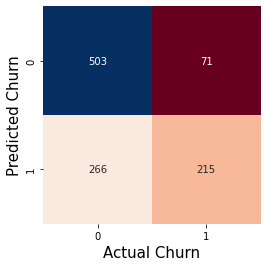

Total predictions = 1055


In [85]:
mat = confusion_matrix(test_labels, svm_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(test_labels))

In [86]:
print('Train error rate = %.2f%%' % ((1 - svm_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - svmmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (svmmod_recall * 100))

Train error rate = 21.43%
Test error rate = 31.94%
Test Recall = 75.17%


Minor concern for underfitting here, but we're not going to worry about it at this point.

In [87]:
print(classification_report(test_labels, svm_preds))

              precision    recall  f1-score   support

          No       0.88      0.65      0.75       769
         Yes       0.45      0.75      0.56       286

    accuracy                           0.68      1055
   macro avg       0.66      0.70      0.65      1055
weighted avg       0.76      0.68      0.70      1055



In reviewing the SVM the overall performance of the model was worst here. The metric we are concerned, recall score, didn't improve either at 50.70%.

We look at feature importane here the same way as we did with Logistic Regression.

In [88]:
df = pd.DataFrame(svm_grid.best_estimator_.coef_, columns = new_order).transpose()

In [92]:
# df = pd.DataFrame(svm_grid.best_estimator_.coef_, columns = new_order).transpose()
df['square'] = df[0] ** 2
df['sqrt'] = [np.sqrt(i) for i in df['square']]
df = df.sort_values('sqrt', ascending=False)
df[:10]

,0,square,sqrt
StreamingMovies,1.074602,1.154770,1.074602
TotalCharges,-1.009481,1.019052,1.009481
InternetService_Fiber optic,0.668364,0.446710,0.668364
tenure,-0.599903,0.359884,0.599903
Dependents,-0.523436,0.273985,0.523436
InternetService_No,-0.519779,0.270170,0.519779
Contract_Two year,-0.489068,0.239187,0.489068
TechSupport,-0.414388,0.171717,0.414388
SeniorCitizen,0.396065,0.156867,0.396065
Contract_Month-to-month,0.372670,0.138883,0.372670


In [93]:
top5 = df[df['sqrt'] > 0.25]

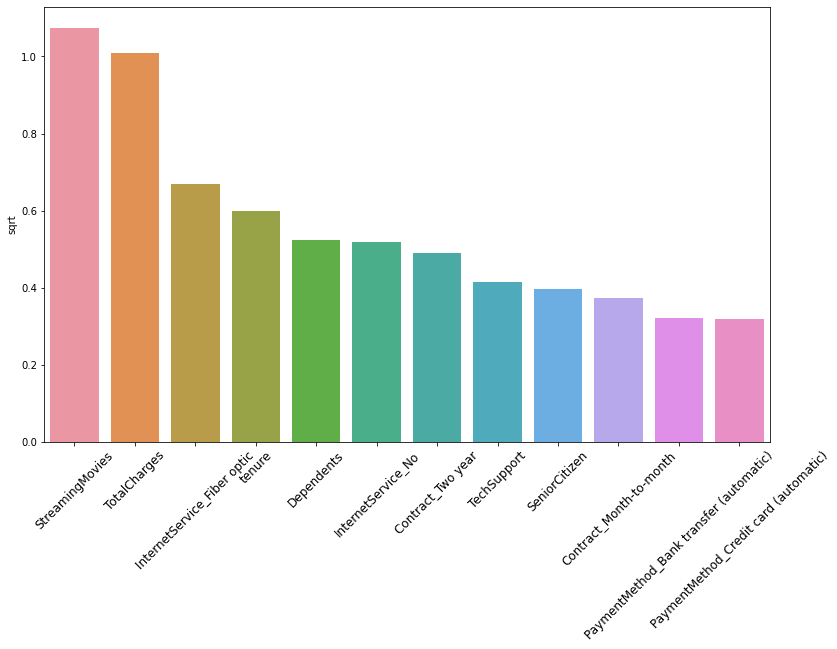

In [94]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top5.index, top5['sqrt'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

SVM with another take on feature importances, considers TotalCharges most important. Then, InternetService_Fiber optic, InternetService_DSL, MonthlyCharges, and TechSupport.

# SMOTE

Now, let's implement SMOTE and see if we get any improvements.

In [95]:
from imblearn.over_sampling import SMOTE

In [98]:
smt = SMOTE(random_state = 2021) 
x_smt, y_smt = smt.fit_resample(train_prep, train_labels) 

In [99]:
param_grid = {
    'n_estimators': random.randint(100,600,3),
    'max_features' : random.randint(10,29,3),
    'max_depth' : [3,4,5],
    'bootstrap' : [True, False]
}

In [100]:
rf_clf = RandomForestClassifier(random_state=2021)
rf_grid = RandomizedSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
rf_grid.fit(x_smt, y_smt)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2021),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5],
                                        'max_features': array([21, 25, 15]),
                                        'n_estimators': array([183, 422, 439])},
                   scoring='accuracy')

In [101]:
final_model = rf_grid.best_estimator_
rf_preds = final_model.predict(test_prep)
rfmod_pred_score = accuracy_score(test_labels, rf_preds)
rfmod_recall = recall_score(test_labels, rf_preds, pos_label='Yes')

In [102]:
print('Train error rate = %.2f%%' % ((1 - rf_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - rfmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (rfmod_recall * 100))

Train error rate = 20.52%
Test error rate = 22.75%
Test Recall = 77.97%


In [103]:
print(classification_report(test_labels, rf_preds))

              precision    recall  f1-score   support

          No       0.90      0.77      0.83       769
         Yes       0.56      0.78      0.65       286

    accuracy                           0.77      1055
   macro avg       0.73      0.77      0.74      1055
weighted avg       0.81      0.77      0.78      1055



# Logistic Regression

In [104]:
# Outline parameters to test
param_grid = [
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['l2'], 'solver': ['lbfgs'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,600,3), 'penalty': ['none'], 'tol': [.01, .001, .0001]},  
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['l1'], 'solver': ['liblinear'], 'tol': [.01, .001, .0001]},
    {'max_iter': random.randint(100,600,3), 'C': [.1,.5,1], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio':[.25, .5, .75], 'tol': [.01, .001, .0001]}
]

In [105]:
log_clf = LogisticRegression()
log_grid = RandomizedSearchCV(log_clf, param_grid, cv=3, scoring='accuracy')
log_grid.fit(x_smt, y_smt)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.1, 0.5, 1],
                                         'max_iter': array([197, 534, 119]),
                                         'penalty': ['l2'], 'solver': ['lbfgs'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'max_iter': array([176, 306, 484]),
                                         'penalty': ['none'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'max_iter': array([105, 279, 184]),
                                         'penalty': ['l1'],
                                         'solver': ['liblinear'],
                                         'tol': [0.01, 0.001, 0.0001]},
                                        {'C': [0.1, 0.5, 1],
                                         'l1_ratio': [0.25, 0.5, 0.75],
                                         'max_iter': array([286, 512, 452]),
                                         'penalty': ['elasticnet'],
                                         'solver': ['saga'],
                                         'tol': [0.01, 0.001, 0.0001]}],
                   scoring='accuracy')

In [106]:
final_model = log_grid.best_estimator_
log_preds = final_model.predict(test_prep)
logmod_pred_score = accuracy_score(test_labels, log_preds)
logmod_recall = recall_score(test_labels, log_preds, pos_label='Yes')

In [107]:
print('Train error rate = %.2f%%' % ((1 - log_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - logmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (logmod_recall * 100))

Train error rate = 21.97%
Test error rate = 26.07%
Test Recall = 75.52%


In [108]:
print(classification_report(test_labels, log_preds))

              precision    recall  f1-score   support

          No       0.89      0.73      0.80       769
         Yes       0.51      0.76      0.61       286

    accuracy                           0.74      1055
   macro avg       0.70      0.74      0.71      1055
weighted avg       0.79      0.74      0.75      1055



# Support Vector Machine

In [109]:
param_grid = [    
    {'C': [.1,1,10], 'max_iter': random.randint(1000,3000,3), 'tol': [1e-4, 1e-10], 'gamma' : [3,5,7]},
    {'C': [.1,1,10], 'max_iter': [-1], 'tol': [1e-4, 1e-10]},
    {'C': [.1,1,10], 'max_iter': random.randint(1000,3000,3), 'kernel': ['linear']}
  ]

In [110]:
# Numerous convergence warnings
svm_clf = SVC(random_state=2021)
svm_grid = RandomizedSearchCV(svm_clf, param_grid, cv=3,
                           scoring='accuracy',
                           n_iter=15)
svm_grid.fit(x_smt, y_smt)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1926).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1926).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1926).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1158).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_i

RandomizedSearchCV(cv=3, estimator=SVC(random_state=2021), n_iter=15,
                   param_distributions=[{'C': [0.1, 1, 10], 'gamma': [3, 5, 7],
                                         'max_iter': array([1926, 1158, 1284]),
                                         'tol': [0.0001, 1e-10]},
                                        {'C': [0.1, 1, 10], 'max_iter': [-1],
                                         'tol': [0.0001, 1e-10]},
                                        {'C': [0.1, 1, 10],
                                         'kernel': ['linear'],
                                         'max_iter': array([1905, 1505, 1002])}],
                   scoring='accuracy')

In [111]:
final_model = svm_grid.best_estimator_
svm_preds = final_model.predict(test_prep)
svmmod_pred_score = accuracy_score(test_labels, svm_preds)
svmmod_recall = recall_score(test_labels, svm_preds, pos_label='Yes')

In [112]:
print('Train error rate = %.2f%%' % ((1 - svm_grid.best_score_) * 100))
print('Test error rate = %.2f%%' % ((1 - svmmod_pred_score) * 100))
print('Test Recall = %.2f%%' % (svmmod_recall * 100))

Train error rate = 10.65%
Test error rate = 26.16%
Test Recall = 33.92%


In [113]:
print(classification_report(test_labels, svm_preds))

              precision    recall  f1-score   support

          No       0.78      0.89      0.83       769
         Yes       0.53      0.34      0.41       286

    accuracy                           0.74      1055
   macro avg       0.66      0.61      0.62      1055
weighted avg       0.71      0.74      0.72      1055



# Conclusions

Let's wrap it all up/summarize and make some conclusions. We can use all this information to raise some more questions as well.

In [114]:
all_recall = [rfmod_recall, logmod_recall, svmmod_recall]

In [115]:
all_acc = [rfmod_pred_score, logmod_pred_score, svmmod_pred_score]

In [116]:
df = pd.DataFrame(list(zip(all_recall, all_acc)), columns =['Recall', 'Accuracy'])

In [117]:
df['Model'] = ['Random Forest', 'Logistic Regresssion', 'Support Vector Machine']

In [118]:
df = df[['Model', 'Recall', 'Accuracy']].reset_index(drop=True)

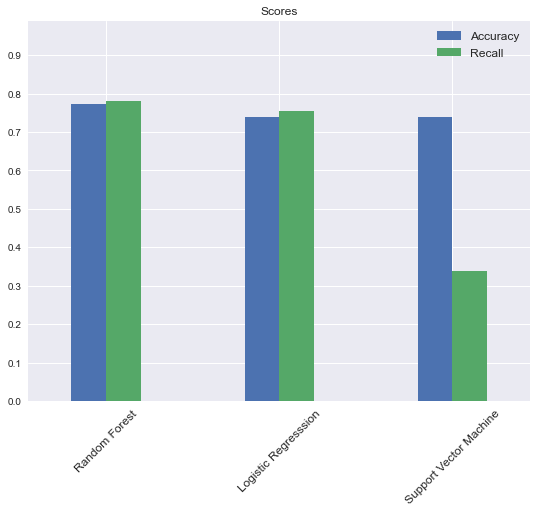

,Model,Recall,Accuracy
0,Random Forest,0.779720,0.772512
1,Logistic Regresssion,0.755245,0.739336
2,Support Vector Machine,0.339161,0.738389


In [119]:
plt.style.use('seaborn')
ax = df.plot(x='Model', y=['Accuracy', 'Recall'], kind="bar", 
             width=.4, ylim=(0,.99), figsize=(9,7), title='Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.yticks(np.arange(0, 1, step=0.1))
ax.set_xlabel("")
plt.legend(prop={'size': 12}, loc=1)
plt.show()

df

If we aggregate the feature importances, we find that our most important features are: InternetService_Fiber optic, MonthlyCharges, TotalCharges, and tenure. These features were most commonly in the top 5 of our models' feature importances.

When we consider the Exploratory Data Analysis we did, it is clear that this company has some issue with their Month-to-month customers. What kind of incentives can this company offer to customers to get them to sign One-year or Two-year contracts? What adjustments can be made to Month-to-Month contracts that would be more favorable to customers, without taking away the appeal of a One-year or Two-year contract?

InternetService was another important factor in making predictions, specifically, Fiber optic internet service. We are not privy to the historical timing of this data, but it is a major problem that more people with fiber optic internet service are leaving than with DSL internet service. With fiber optics being the newer technology, maybe it’s possible that the company was still working out some kinks? Regardless, if the newer (and supposed to be more efficient) technology is causing people to run from your company, you have a problem. More in-depth research is needed to fully understand this InternetService issue, but at the least we now know that it is an area to focus on.

As far as model performance, Random Forest with SMOTE performed best. Second place goes to the Logistic Regression, and Support Vector Machine last.

We were able to learn a lot from the project: how long customers are staying with the company, which features are most likely to contribute to customers leaving, and we have 3 different models to test for predicting customer churning. Most importantly, we've raised concerns that allow for some questions to be answered, for further investigation to be completed, and for more information to be gathered. We now have targets to focus in on and conduct a new study in the future.